# Feature Analysis

This notebook takes the labeled dataset created in 1.3 and analysis the features (imports) for both goodware and malware.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

pe32 = pd.read_csv('data/pe32_imports_labeled.csv')

cv_token_pattern = u'[^;]+'
min_df=2

## Imports on goodware/malware

In [2]:
goodware = pe32[pe32.malware == 0]
malware = pe32[pe32.malware == 1]

cv = CountVectorizer(token_pattern=cv_token_pattern)

cv.fit(goodware.imports)
good_imports = cv.get_feature_names()
print('Unique goodware imports: {0}'.format(len(good_imports)))

cv.fit(malware.imports)
mal_imports = cv.get_feature_names()
print('Unique malware imports: {0}'.format(len(mal_imports)))

print('Common imports: {0}'.format(len([i for i in good_imports if i in mal_imports])))

Unique goodware imports: 239545
Unique malware imports: 34583
Common imports: 22031


## Feature variation on goodware

Number of features: 85774


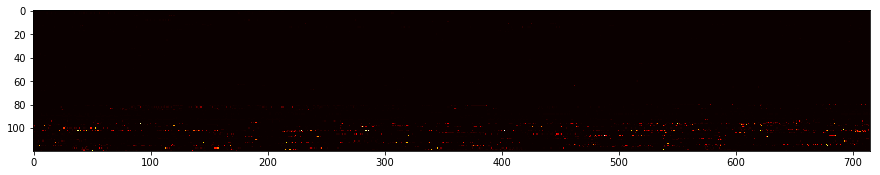

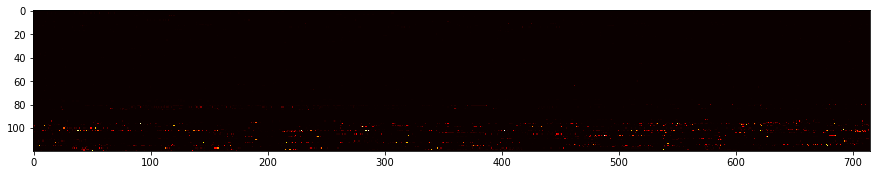

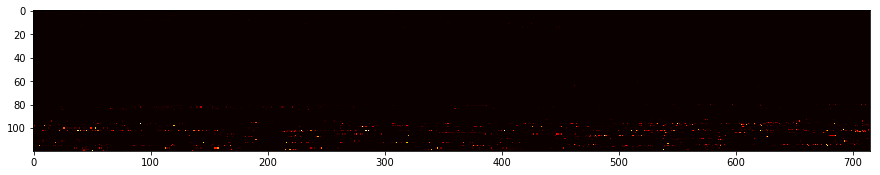

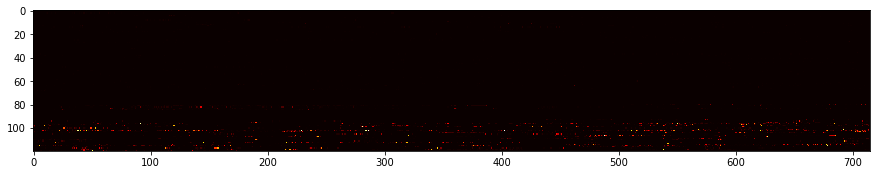

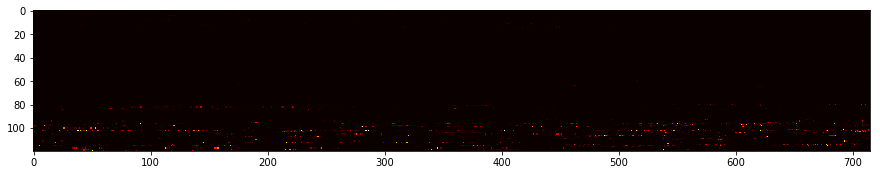

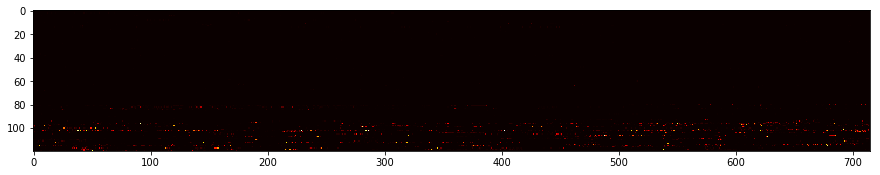

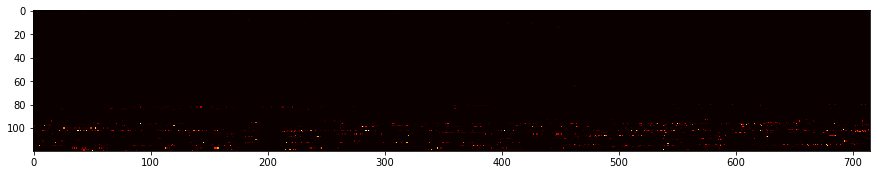

In [3]:
cv = CountVectorizer(token_pattern=cv_token_pattern, min_df=min_df)
cv.fit(goodware.imports)
good_imports = cv.get_feature_names()
print('Number of features: {0}'.format(len(good_imports)))

for _, df in goodware.groupby(np.arange(len(goodware)) // 5000):
    matrix = np.sum(cv.transform(df.imports).toarray(), axis=0, dtype=int)
    matrix = np.divide(matrix, np.amax(matrix))
    matrix = np.array_split(matrix, 120)
    matrix = pd.DataFrame(matrix).fillna(0)
    plt.figure(figsize=(15, 15))
    plt.imshow(matrix, cmap='hot')
    plt.show()

## Feature variation on malware

Number of features: 18457


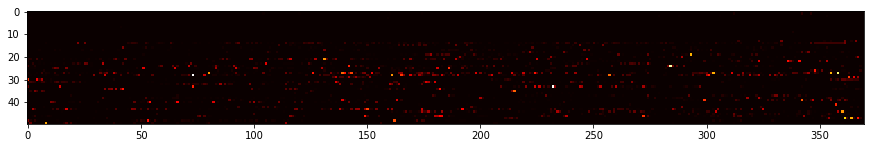

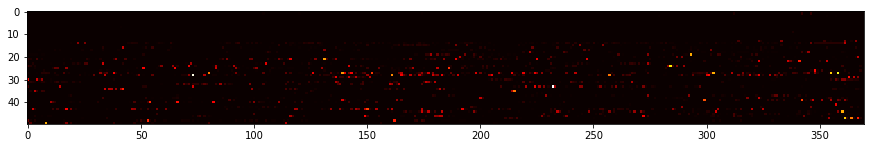

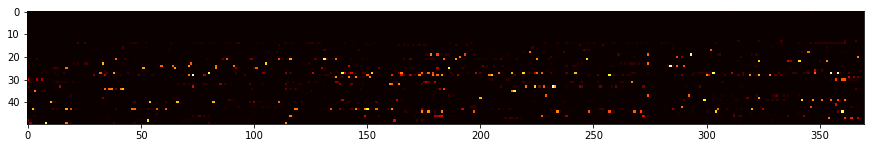

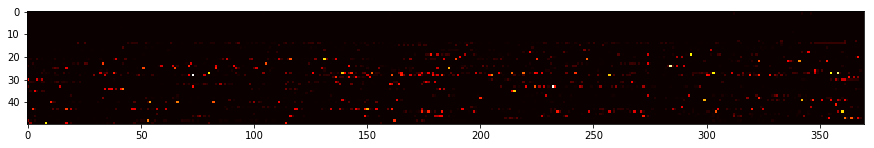

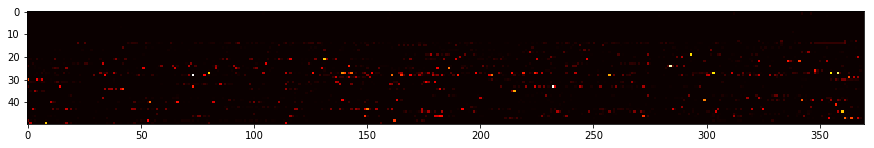

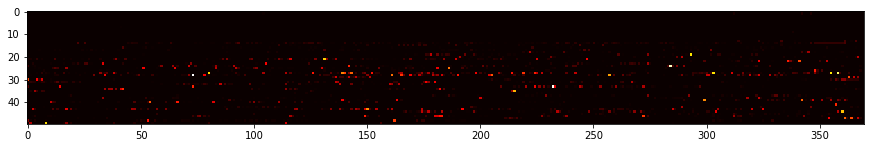

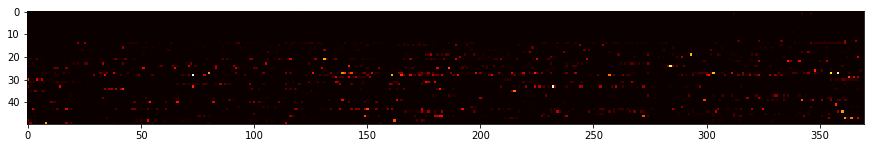

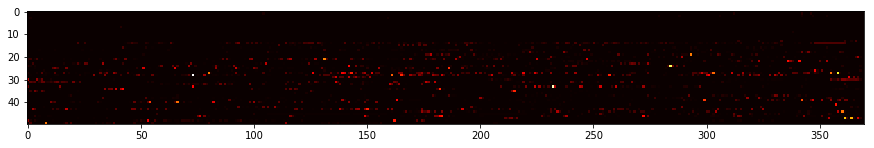

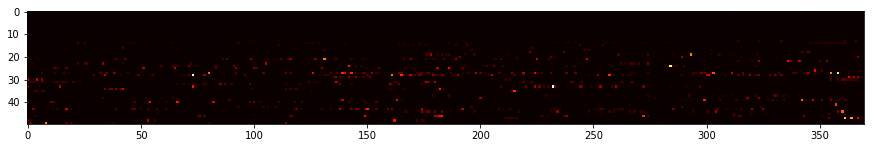

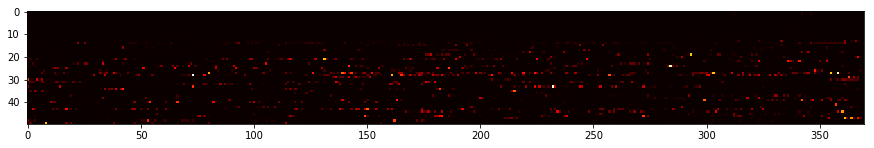

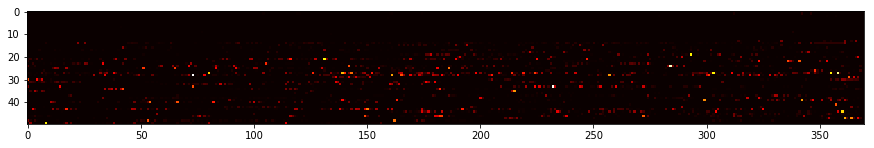

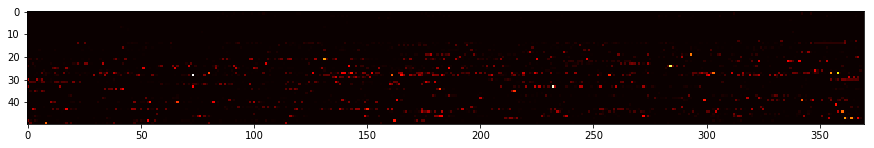

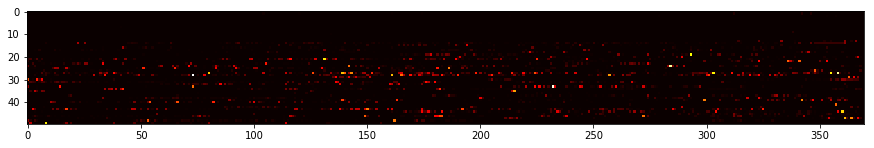

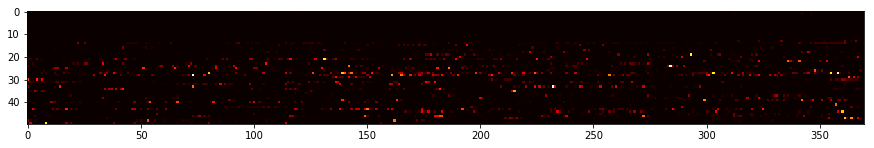

In [4]:
cv = CountVectorizer(token_pattern=cv_token_pattern, min_df=min_df)
cv.fit(malware.imports)
mal_imports = cv.get_feature_names()
print('Number of features: {0}'.format(len(mal_imports)))

for _, df in malware.groupby(np.arange(len(malware)) // 5000):
    matrix = np.sum(cv.transform(df.imports).toarray(), axis=0, dtype=int)
    matrix = np.divide(matrix, np.amax(matrix))
    matrix = np.array_split(matrix, 50)
    matrix = pd.DataFrame(matrix).fillna(0)
    plt.figure(figsize=(15, 15))
    plt.imshow(matrix, cmap='hot')
    plt.show()

# Common features with min_df=2

In [5]:
common_imports = [i for i in good_imports if i in mal_imports]
print('Common imports: {0}'.format(len(common_imports)))

Common imports: 13445


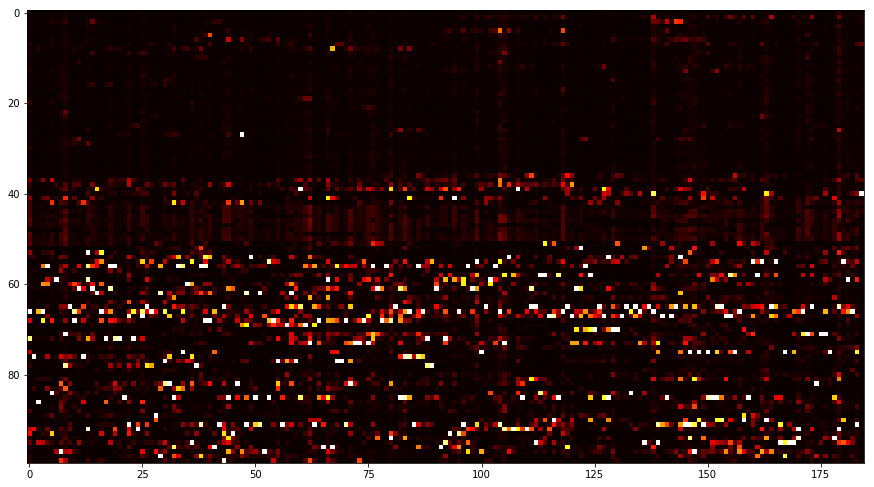

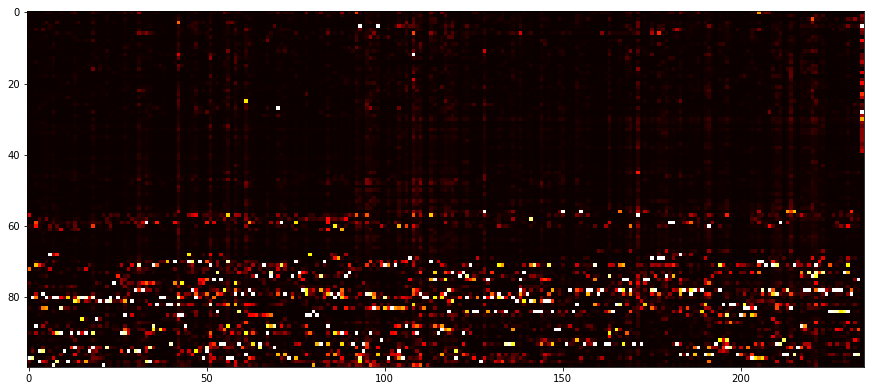

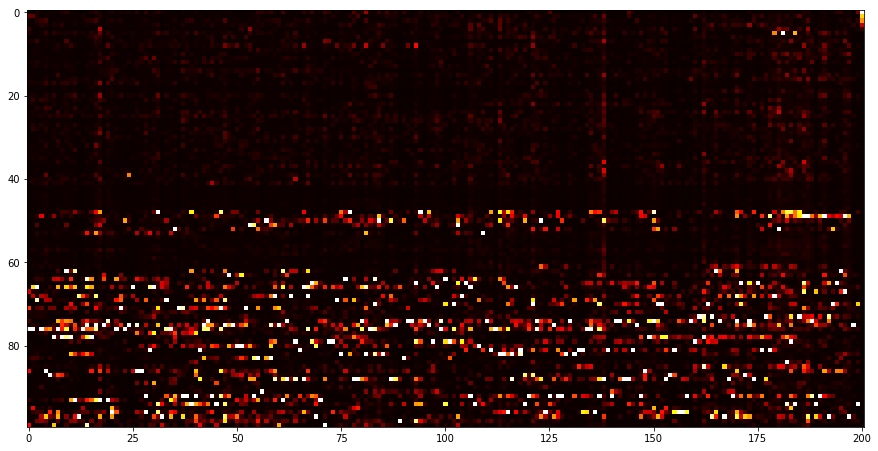

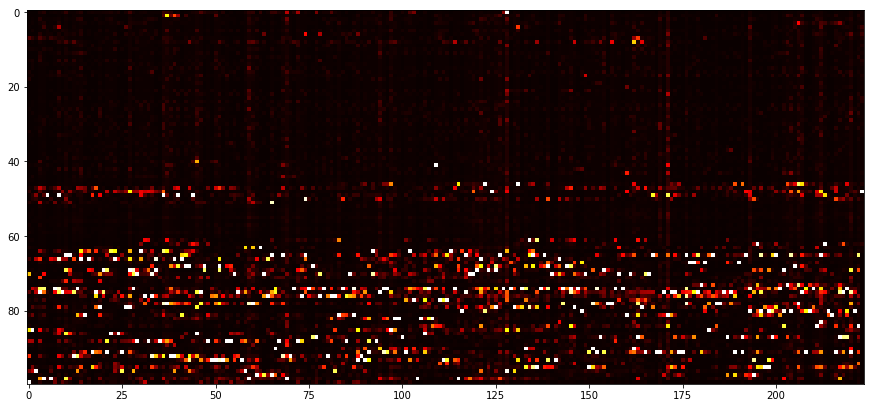

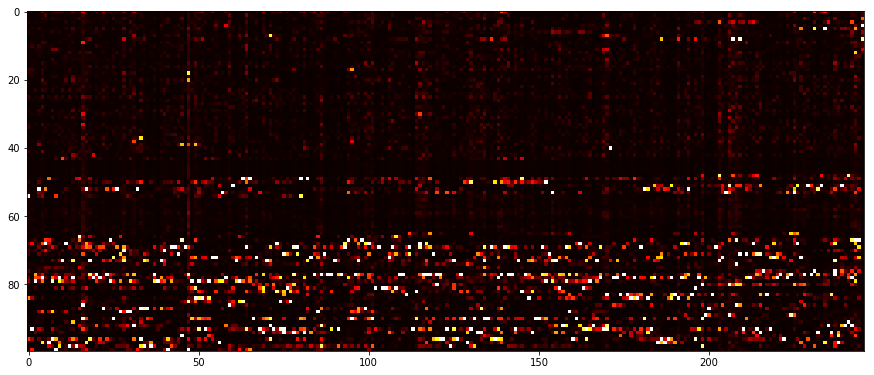

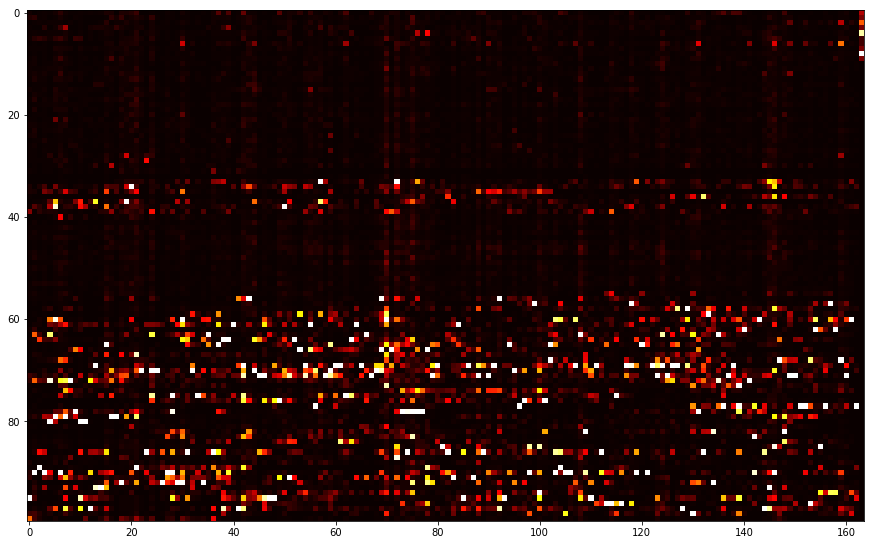

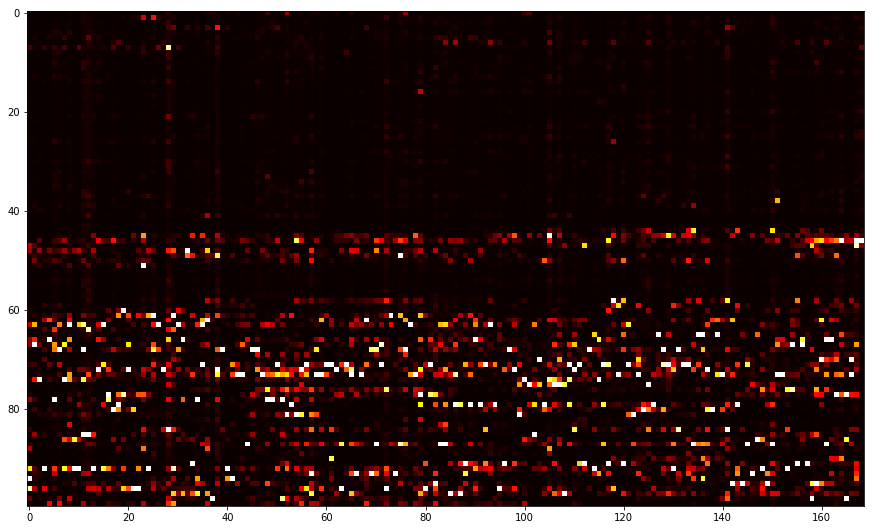

In [6]:
mal_counter = 0
for _, df in goodware.groupby(np.arange(len(goodware)) // 5000):
    cv = CountVectorizer(token_pattern=cv_token_pattern, min_df=min_df)
    cv.fit(pd.concat([df, malware[mal_counter:mal_counter + len(df)]]).imports)
    
    matrixg = np.sum(cv.transform(df.imports).toarray(), axis=0, dtype=int)
    matrixg = np.divide(matrixg, np.amax(matrixg))
    matrixg = np.array_split(matrixg, 100)
    matrixg = pd.DataFrame(matrixg, dtype=float).fillna(0)
    mal_counter += len(df)

    matrixb = np.sum(cv.transform(malware[mal_counter:mal_counter + len(df)].imports).toarray(), axis=0, dtype=int)
    matrixb = np.divide(matrixb, np.amax(matrixb))
    matrixb = np.array_split(matrixb, 100)
    matrixb = pd.DataFrame(matrixb, dtype=float).fillna(0)
    
    matrix = (matrixg - matrixb).abs()
    matrix = matrix.divide(np.amax(matrix))
    plt.figure(figsize=(15,15))
    plt.imshow(matrix, cmap='hot')
    plt.show()